In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.regression import *

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pycaret\internal\logging.py:146: UserWarning: Could not attach a FileHandler to the logger at path logs.log! No logs will be saved.
  warnings.warn(
Traceback (most recent call last):
  File "C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pycaret\internal\logging.py", line 144, in create_logger
    ch = logging.FileHandler(path)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.1776.0_x64__qbz5n2kfra8p0\lib\logging\__init__.py", line 1169, in __init__
    StreamHandler.__init__(self, self._open())
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.1776.0_x64__qbz5n2kfra8p0\lib\logging\__init__.py", line 1201, in _open
    return open_func(self.baseFilename, self.mode,
PermissionError: [Errno 13] Permissio

In [ ]:
pip install pycaret[full]

In [ ]:
pip install interpret-community

**Data**

In [ ]:
#dataset
#from google.colab import files
#f=files.upload()

In [2]:
#Encoding method 1
df=pd.read_excel(r'C:\Users\Asus\Desktop/xrd_new.xlsx', sheet_name='Sheet6')

Pycaret

In [3]:
x=df.drop('Isc', axis=1)

reg = setup(data=x , target = 'FF' ,normalize=True , normalize_method='minmax',train_size=0.8,fold=3

             ,ignore_features=['schw 1', 'schw 2','schw 3', 'schw 4', 'schw 5', 'schw 6']

            ,remove_multicollinearity = True, multicollinearity_threshold= 0.9

            ,session_id=1543)

Traceback (most recent call last):
  File "C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pycaret\internal\logging.py", line 144, in create_logger
    ch = logging.FileHandler(path)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.1776.0_x64__qbz5n2kfra8p0\lib\logging\__init__.py", line 1169, in __init__
    StreamHandler.__init__(self, self._open())
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.1776.0_x64__qbz5n2kfra8p0\lib\logging\__init__.py", line 1201, in _open
    return open_func(self.baseFilename, self.mode,
PermissionError: [Errno 13] Permission denied: 'C:\\Program Files\\Microsoft VS Code\\logs.log'


,Description,Value
0,Session id,1543
1,Target,FF
2,Target type,Regression
3,Original data shape,"(27, 32)"
4,Transformed data shape,"(27, 15)"
5,Transformed train set shape,"(21, 15)"
6,Transformed test set shape,"(6, 15)"
7,Ignore features,6
8,Numeric features,25
9,Preprocess,True


In [4]:
best = compare_models(cross_validation=False)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:00:32
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.4170,0.2950,0.5431,0.9578,0.0116,0.0094,0.2200
dt,Decision Tree Regressor,0.6857,0.9939,0.9969,0.8580,0.0232,0.0159,0.7800
xgboost,Extreme Gradient Boosting,0.7718,1.0272,1.0135,0.8532,0.0223,0.0175,3.0400
rf,Random Forest Regressor,0.8604,1.1369,1.0663,0.8375,0.0253,0.0207,0.9600
ada,AdaBoost Regressor,1.0534,1.1980,1.0945,0.8288,0.0244,0.0243,2.4500
et,Extra Trees Regressor,1.3089,1.7824,1.3351,0.7453,0.0306,0.0307,0.5100
lar,Least Angle Regression,1.2531,2.2217,1.4905,0.6825,0.0340,0.0293,1.3600
lr,Linear Regression,1.2535,2.2228,1.4909,0.6823,0.0340,0.0293,2.9700
ridge,Ridge Regression,1.1996,2.4122,1.5531,0.6553,0.0361,0.0286,0.4400
par,Passive Aggressive Regressor,1.3335,2.4576,1.5677,0.6488,0.0368,0.0320,1.0600


GBR

In [5]:
gbr=create_model('gbr',cross_validation = False, return_train_score=True)
evaluate_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.4170,0.2950,0.5431,0.9578,0.0116,0.0094
Train,0.1101,0.0207,0.1438,0.9960,0.0033,0.0025


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

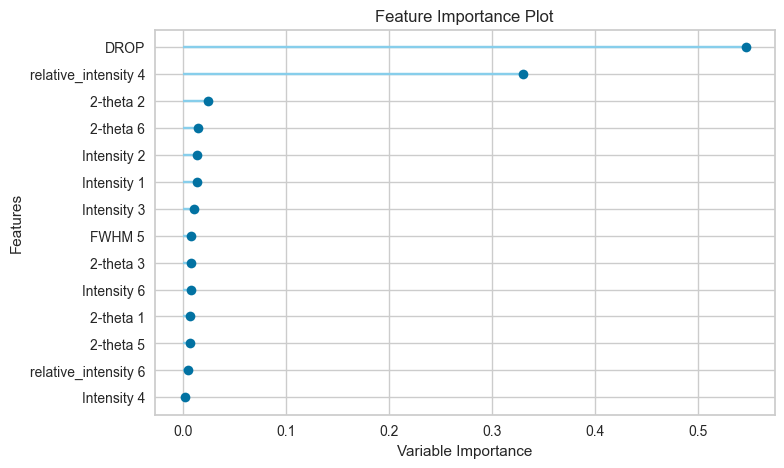

In [6]:
plot_model(gbr, plot = 'feature_all')

Permutation Feature Importance => pfi

In [ ]:
#all rows(sample)
interpret_model(gbr, plot='pfi')

14it [00:00, 109.10it/s]


In [ ]:
interpret_model(gbr, plot='msa')

In [ ]:
#sample1
specific_rows1 = x.iloc[[0,1,2,3,4,5], :]

# Get pfi for the specific rows
interpret_model(gbr, data=specific_rows1, plot='pfi')

14it [00:00, 88.85it/s]


In [ ]:
interpret_model(gbr, data=specific_rows1, plot='msa')

In [ ]:
#sample2
specific_rows2 = x.iloc[[6,7,8], :]

interpret_model(gbr, data=specific_rows2, plot='pfi')

14it [00:00, 195.81it/s]


In [ ]:
interpret_model(gbr, data=specific_rows2, plot='msa')

In [ ]:
#sample3
specific_rows3 = x.iloc[[9,10,11,12,13,14], :]

interpret_model(gbr, data=specific_rows3, plot='pfi')

14it [00:00, 168.82it/s]


In [ ]:
interpret_model(gbr, data=specific_rows3, plot='msa')

In [ ]:
#sample4
specific_rows4 = x.iloc[[15,16,17,18,19,20], :]

interpret_model(gbr, data=specific_rows4, plot='pfi')

14it [00:00, 49.75it/s]


In [ ]:
interpret_model(gbr, data=specific_rows4, plot='msa')

In [ ]:
#sample5
specific_rows5 = x.iloc[[21,22,23,24,25,26], :]

interpret_model(gbr, data=specific_rows5, plot='pfi')

14it [00:00, 96.12it/s]


In [ ]:
interpret_model(gbr, data=specific_rows5, plot='msa')

Rf

In [7]:
rf=create_model('rf',cross_validation = False, return_train_score=True)
evaluate_model(rf)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:03:59
Status,. . . . . . . . . . . . . . . . . .,Fitting Random Forest Regressor
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.8604,1.1369,1.0663,0.8375,0.0253,0.0207
Train,0.6878,0.7775,0.8817,0.8501,0.0202,0.0159


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

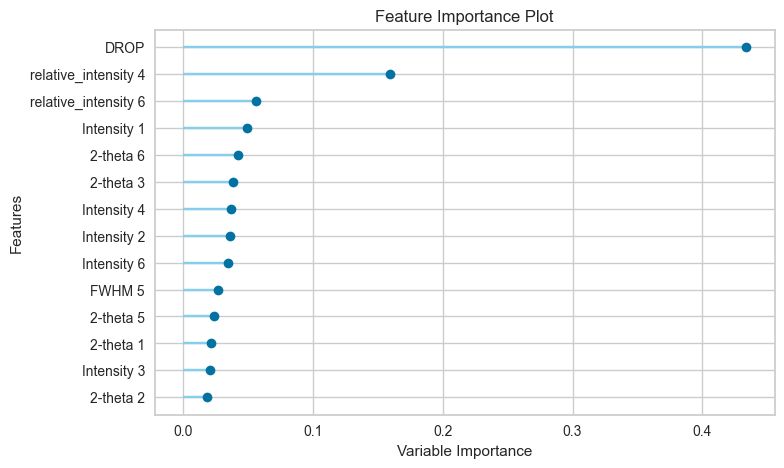

In [8]:
plot_model(rf, plot = 'feature_all')

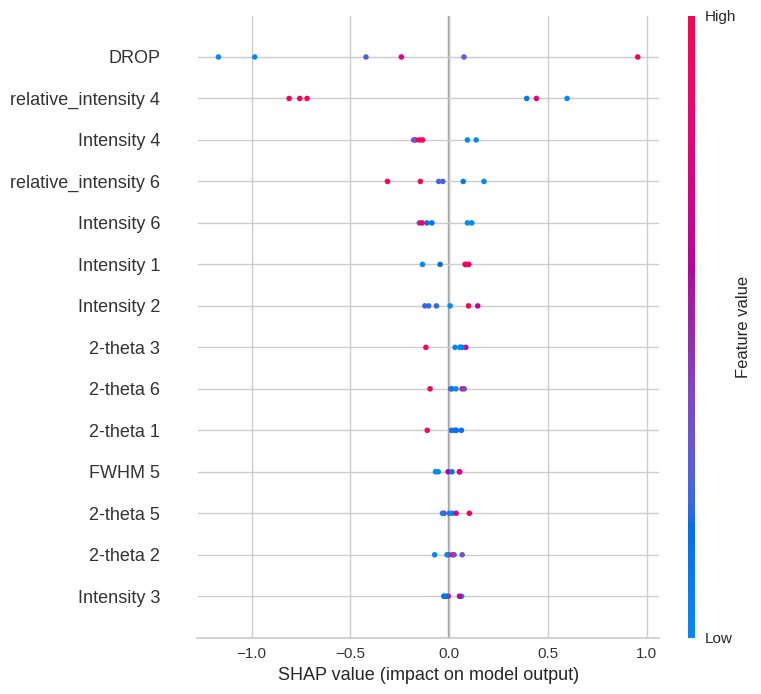

In [ ]:
#all rows(samples)
interpret_model(rf, plot='summary')

In [ ]:
#interpret_model(rf, plot='correlation')
interpret_model(rf, plot='pfi')

14it [00:00, 27.23it/s]


In [ ]:
#sample1
specific_rows1= x.iloc[[0, 1, 2,3,4,5], :]

# Get pfi for the specific rows
interpret_model(rf, data=specific_rows1, plot='pfi')

14it [00:00, 34.08it/s]


In [ ]:
#sample2
specific_rows2 = x.iloc[[6,7,8], :]

interpret_model(rf, data=specific_rows2, plot='pfi')

14it [00:00, 28.19it/s]


In [ ]:
#sample3
specific_rows3 = x.iloc[[9,10,11,12,13,14], :]

interpret_model(rf, data=specific_rows3, plot='pfi')

14it [00:00, 27.57it/s]


In [ ]:
#sample4
specific_rows4 = x.iloc[[15,16,17,18,19,20], :]

interpret_model(rf, data=specific_rows4, plot='pfi')

14it [00:00, 36.79it/s]


In [ ]:
#sample5
specific_rows5 = x.iloc[[21,22,23,24,25,26], :]

interpret_model(rf, data=specific_rows5, plot='pfi')

14it [00:00, 19.54it/s]


In [ ]:
df.info()

In [ ]:
x=df.drop('Isc', axis=1)

reg= setup(data=x , target = 'FF' ,normalize=True , normalize_method='minmax',train_size=0.8,fold=3
           ,ordinal_features= { 'DROP' : [1,2,3,4,5,6] }

             ,ignore_features=['schw 1', 'schw 2','schw 3', 'schw 4', 'schw 5', 'schw 6']

            ,remove_multicollinearity = True, multicollinearity_threshold= 0.9

            ,session_id=1543)

In [ ]:
best = compare_models(cross_validation=False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.4193,0.2960,0.5440,0.9577,0.0117,0.0094,0.1100
dt,Decision Tree Regressor,0.6857,0.9939,0.9969,0.8580,0.0232,0.0159,0.0600
xgboost,Extreme Gradient Boosting,0.7718,1.0272,1.0135,0.8532,0.0223,0.0175,4.1100
rf,Random Forest Regressor,0.8990,1.2365,1.1120,0.8233,0.0263,0.0217,0.2200
ada,AdaBoost Regressor,1.1757,1.4449,1.2020,0.7935,0.0270,0.0273,0.1300
et,Extra Trees Regressor,1.3089,1.7824,1.3351,0.7453,0.0306,0.0307,0.1700
lr,Linear Regression,1.2535,2.2228,1.4909,0.6823,0.0340,0.0293,0.2200
lar,Least Angle Regression,1.2535,2.2228,1.4909,0.6823,0.0340,0.0293,0.2200
ridge,Ridge Regression,1.1996,2.4122,1.5531,0.6553,0.0361,0.0286,0.2500
par,Passive Aggressive Regressor,1.3335,2.4576,1.5677,0.6488,0.0368,0.0320,0.1200


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
gbr=create_model('gbr',cross_validation = False, return_train_score=True)
evaluate_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.4193,0.2960,0.5440,0.9577,0.0117,0.0094
Train,0.1101,0.0207,0.1438,0.9960,0.0033,0.0025


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…